In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
import sys
sys.path.append('../src')
from preprocess import HTRUPreprocessor
from models import PulsarModelFramework
from utils import VisualizationUtils

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 300

print("HTRU2 Pulsar Detection - Model Training & Evaluation")
print("=" * 50)


HTRU2 Pulsar Detection - Model Training & Evaluation


In [2]:
# Initialize preprocessor
preprocessor = HTRUPreprocessor(
    scaler_type='robust',  # RobustScaler handles outliers better
    balancing_method='smote',  # Use SMOTE for class imbalance
    random_state=42
)

# Load and preprocess data
X_train, X_val, X_test, y_train, y_val, y_test = preprocessor.prepare_data()

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nClass distribution (training set):")
print(f"Non-pulsars: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"Pulsars: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

INFO:preprocess:Starting data preprocessing pipeline...
INFO:preprocess:Loaded dataset with shape: (17898, 9)
INFO:preprocess:Class distribution: {0: np.int64(16259), 1: np.int64(1639)}
INFO:preprocess:Split sizes - Train: 12528, Val: 1790, Test: 3580
INFO:preprocess:Features scaled using robust scaler
INFO:preprocess:Data balanced using smote
INFO:preprocess:New class distribution: [11381 11381]
INFO:preprocess:Preprocessing pipeline completed successfully


Training set shape: (22762, 8)
Validation set shape: (1790, 8)
Test set shape: (3580, 8)

Class distribution (training set):
Non-pulsars: 11381 (50.0%)
Pulsars: 11381 (50.0%)


In [3]:
# Initialize model framework
model_framework = PulsarModelFramework(random_state=42)

# Optional: Perform quick cross-validation to assess baseline models
cv_results = model_framework.cross_validate_models(X_train, y_train, cv=5, scoring='roc_auc')
print("\nCross-Validation Results (ROC AUC):")
print(cv_results.sort_values('CV_Mean', ascending=False))


INFO:models:Cross-validating LogisticRegression...
INFO:models:Cross-validating RandomForest...
INFO:models:Cross-validating GradientBoosting...
INFO:models:Cross-validating XGBoost...
INFO:models:Cross-validating LightGBM...
INFO:models:Cross-validating CatBoost...
INFO:models:Cross-validating SVM...
INFO:models:Cross-validating MLP...
INFO:models:Cross-validating KNeighbors...
INFO:models:Cross-validating GaussianNB...



Cross-Validation Results (ROC AUC):
                Model   CV_Mean    CV_Std    CV_Min    CV_Max
0        RandomForest  0.997064  0.000780  0.996188  0.998177
1             XGBoost  0.996502  0.000754  0.995705  0.997846
2            CatBoost  0.996096  0.000678  0.995362  0.997289
3            LightGBM  0.995919  0.000786  0.994984  0.997214
4                 MLP  0.991762  0.001428  0.989590  0.993915
5          KNeighbors  0.989800  0.001580  0.987504  0.991705
6    GradientBoosting  0.987995  0.001532  0.985712  0.989939
7  LogisticRegression  0.978164  0.002193  0.975407  0.981170
8                 SVM  0.977364  0.002272  0.974438  0.980344
9          GaussianNB  0.955483  0.003913  0.951308  0.962154


In [4]:
# Train all models (with hyperparameter tuning)
results = model_framework.train_all_models(
    X_train, y_train,
    X_val, y_val,
    use_hyperparameter_tuning=True
)

# Generate results DataFrame
results_df = model_framework.create_results_dataframe()
print("\nModel Performance Comparison:")
print(results_df.round(4))


INFO:models:Training 10 models...
INFO:models:Training LogisticRegression...
INFO:models:Performing hyperparameter tuning for LogisticRegression...
INFO:models:Best parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
INFO:models:LogisticRegression - ROC AUC: 0.9837, F1: 0.8507
INFO:models:Training RandomForest...
INFO:models:Performing hyperparameter tuning for RandomForest...
INFO:models:Best parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
INFO:models:RandomForest - ROC AUC: 0.9679, F1: 0.8810
INFO:models:Training GradientBoosting...
INFO:models:Performing hyperparameter tuning for GradientBoosting...
INFO:models:Best parameters for GradientBoosting: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
INFO:models:GradientBoosting - ROC AUC: 0.9670, F1: 0.8555
INFO:models:Training XGBoost...
INFO:models:Performing hyperparameter tuning


Model Performance Comparison:
                Model  accuracy  precision  recall  f1_score  roc_auc  pr_auc  \
0                 SVM    0.9749     0.8287  0.9146    0.8696   0.9843  0.9391   
1  LogisticRegression    0.9704     0.7906  0.9207    0.8507   0.9837  0.9389   
2                 MLP    0.9715     0.8156  0.8902    0.8513   0.9746  0.9178   
3            LightGBM    0.9765     0.8506  0.9024    0.8757   0.9729  0.9299   
4             XGBoost    0.9743     0.8315  0.9024    0.8655   0.9720  0.9321   
5            CatBoost    0.9749     0.8287  0.9146    0.8696   0.9714  0.9355   
6        RandomForest    0.9777     0.8605  0.9024    0.8810   0.9679  0.9304   
7    GradientBoosting    0.9721     0.8132  0.9024    0.8555   0.9670  0.9241   
8          KNeighbors    0.9447     0.6371  0.9207    0.7531   0.9644  0.8850   
9          GaussianNB    0.9436     0.6438  0.8598    0.7363   0.9619  0.8720   

      mcc  log_loss  specificity  balanced_accuracy  
0  0.8570    0.1346    

INFO:utils:ROC curves plot saved to ../results/figures/roc_curves.png


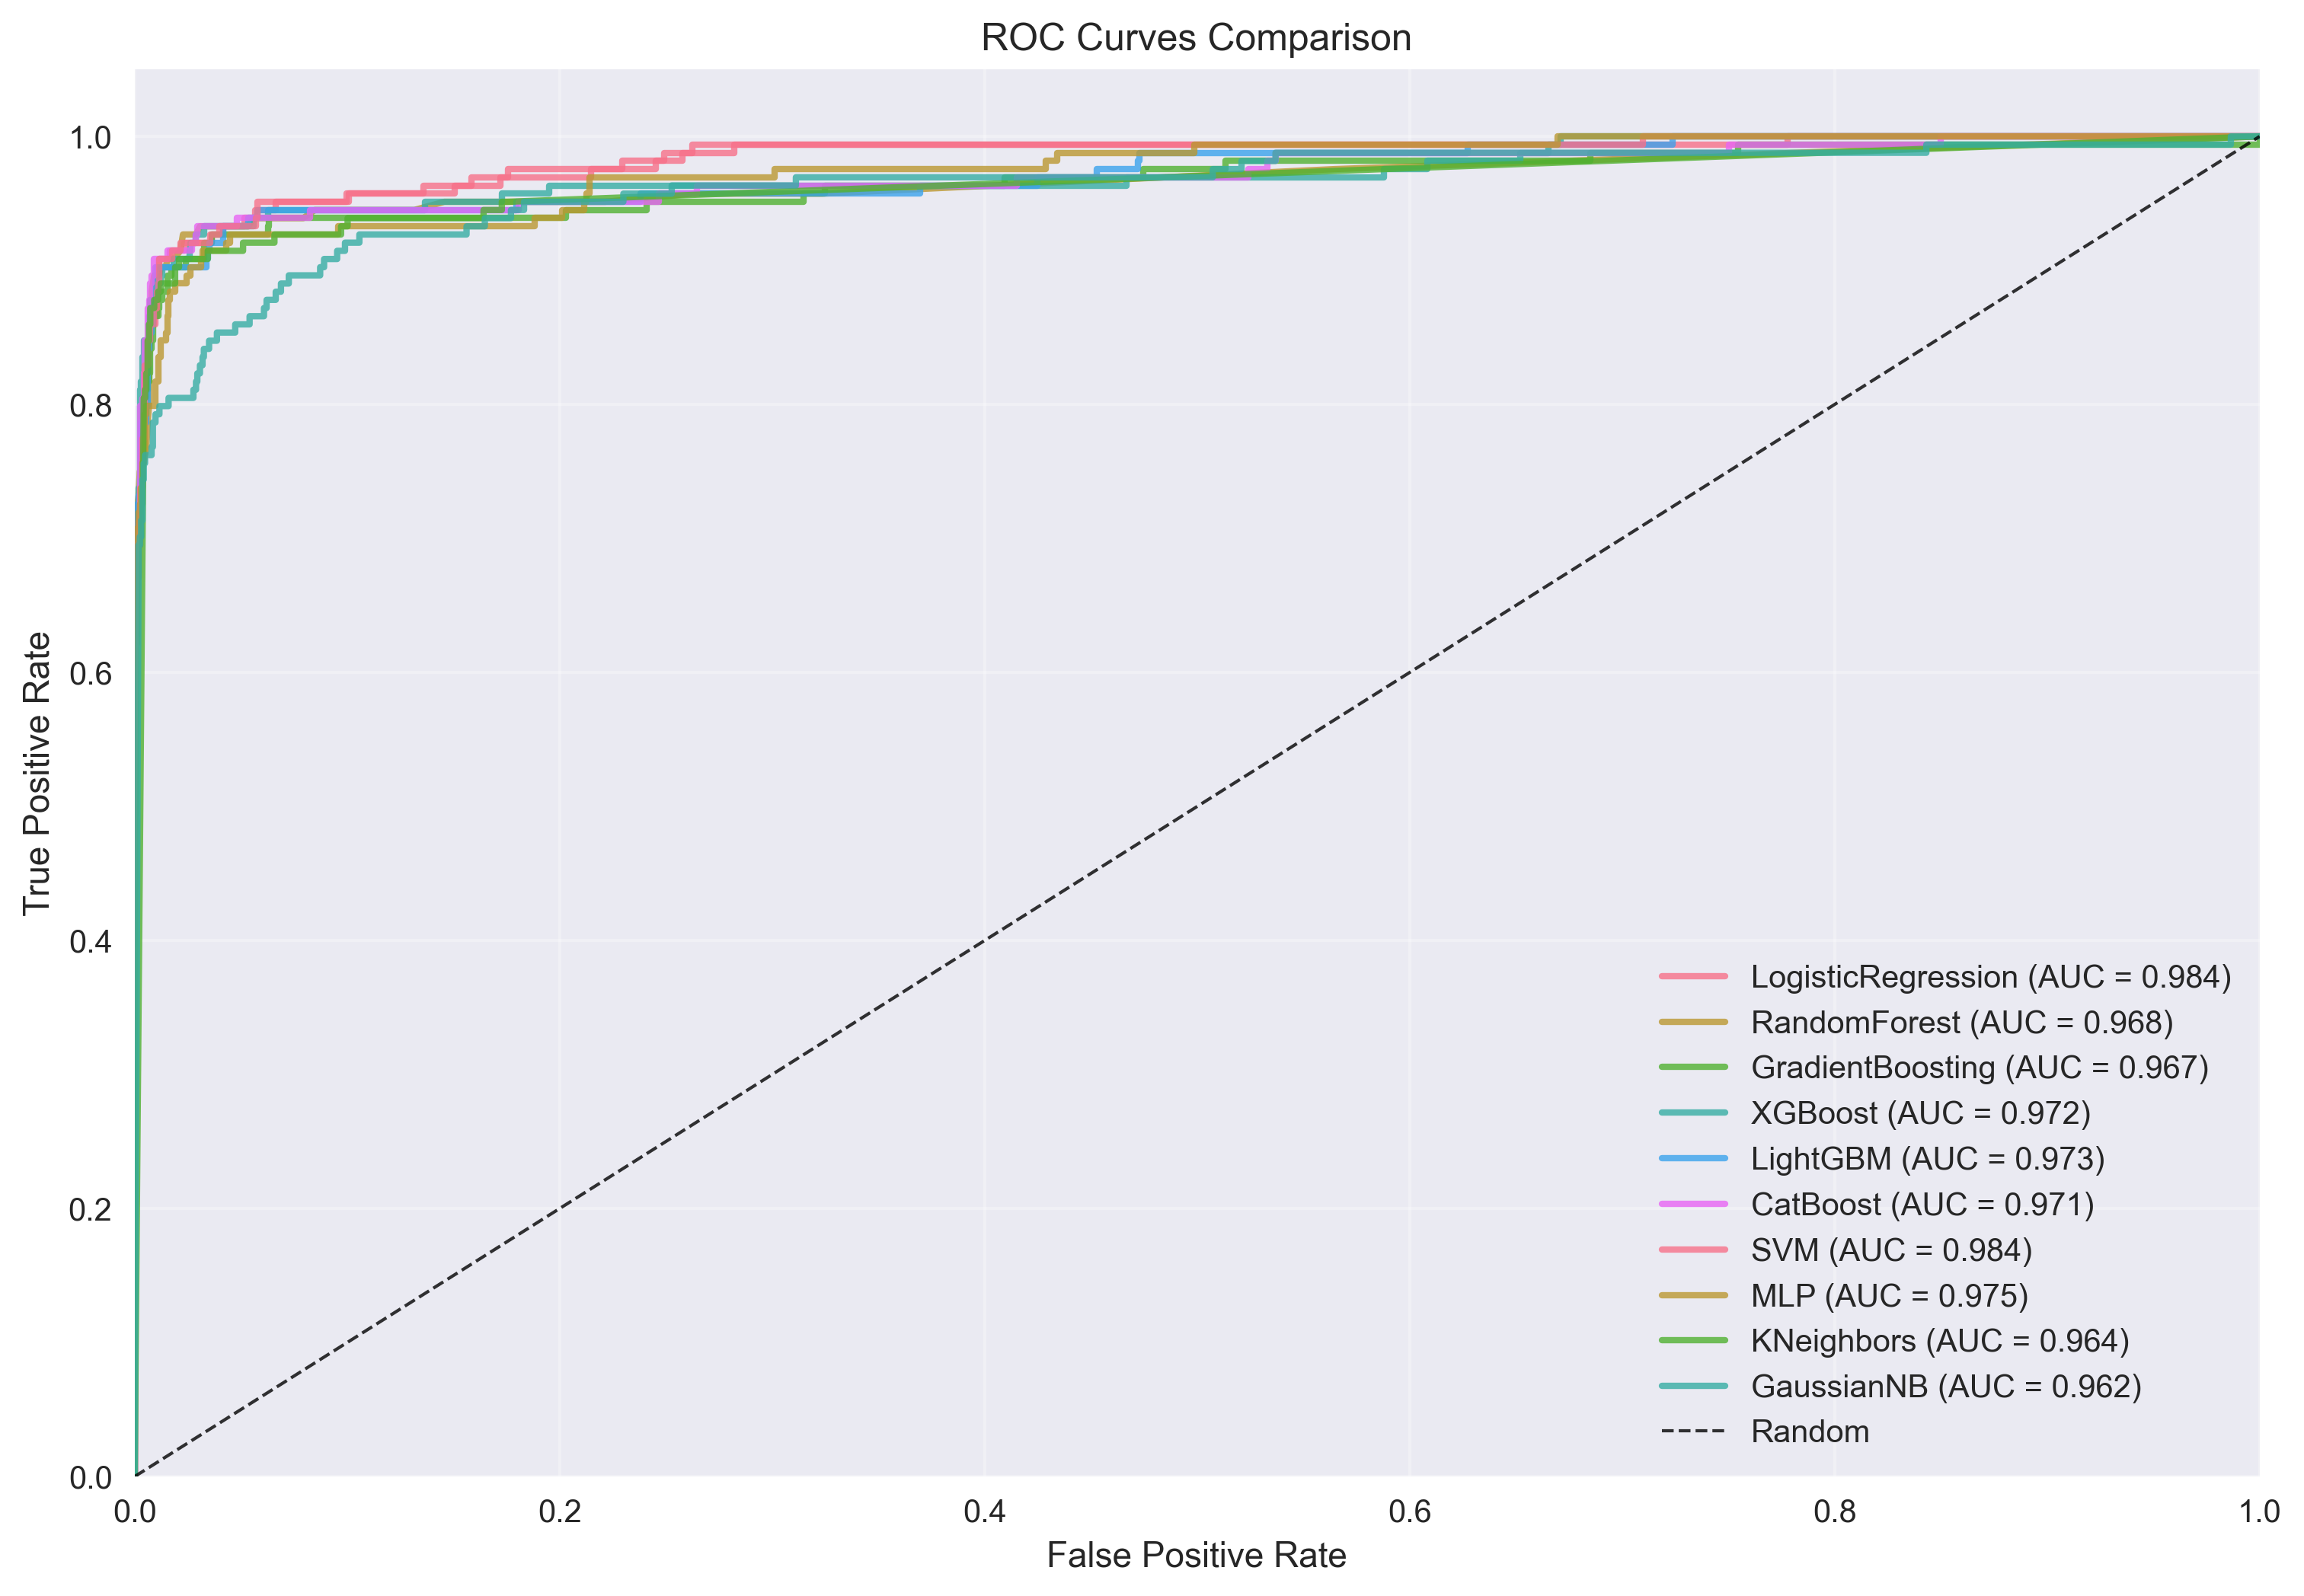

INFO:utils:PR curves plot saved to ../results/figures/pr_curves.png


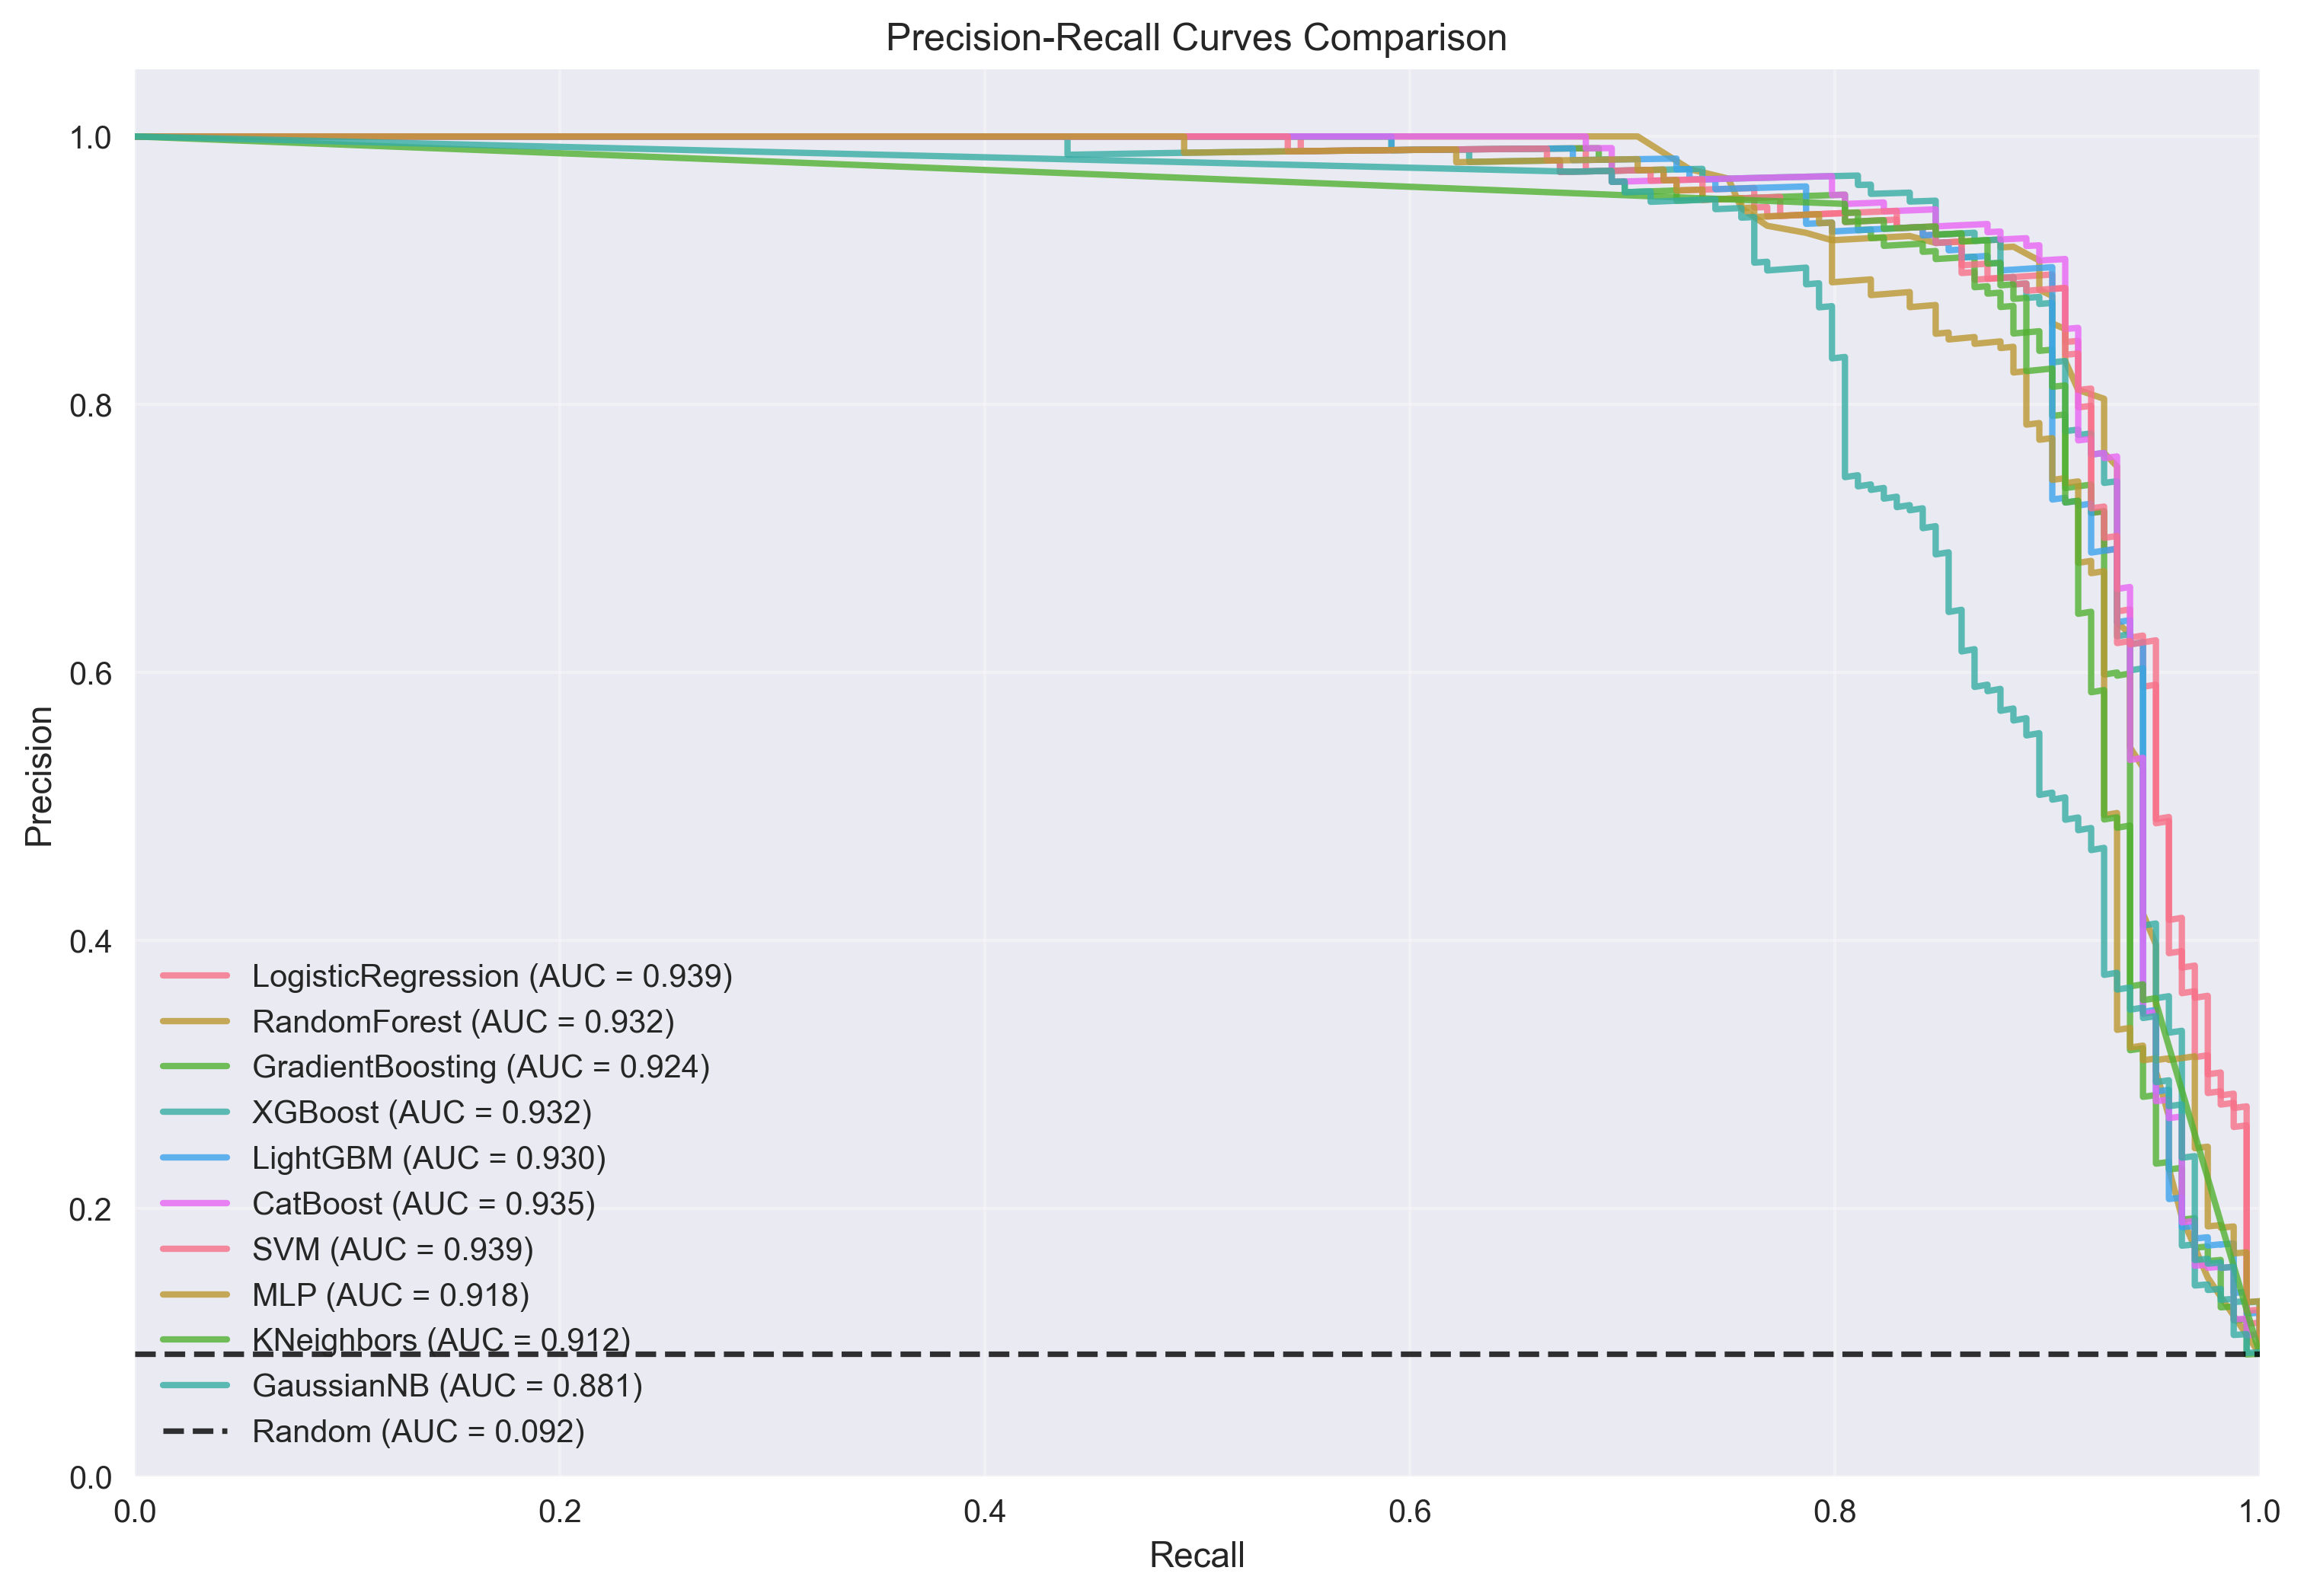

INFO:utils:Confusion matrices plot saved to ../results/figures/confusion_matrices.png


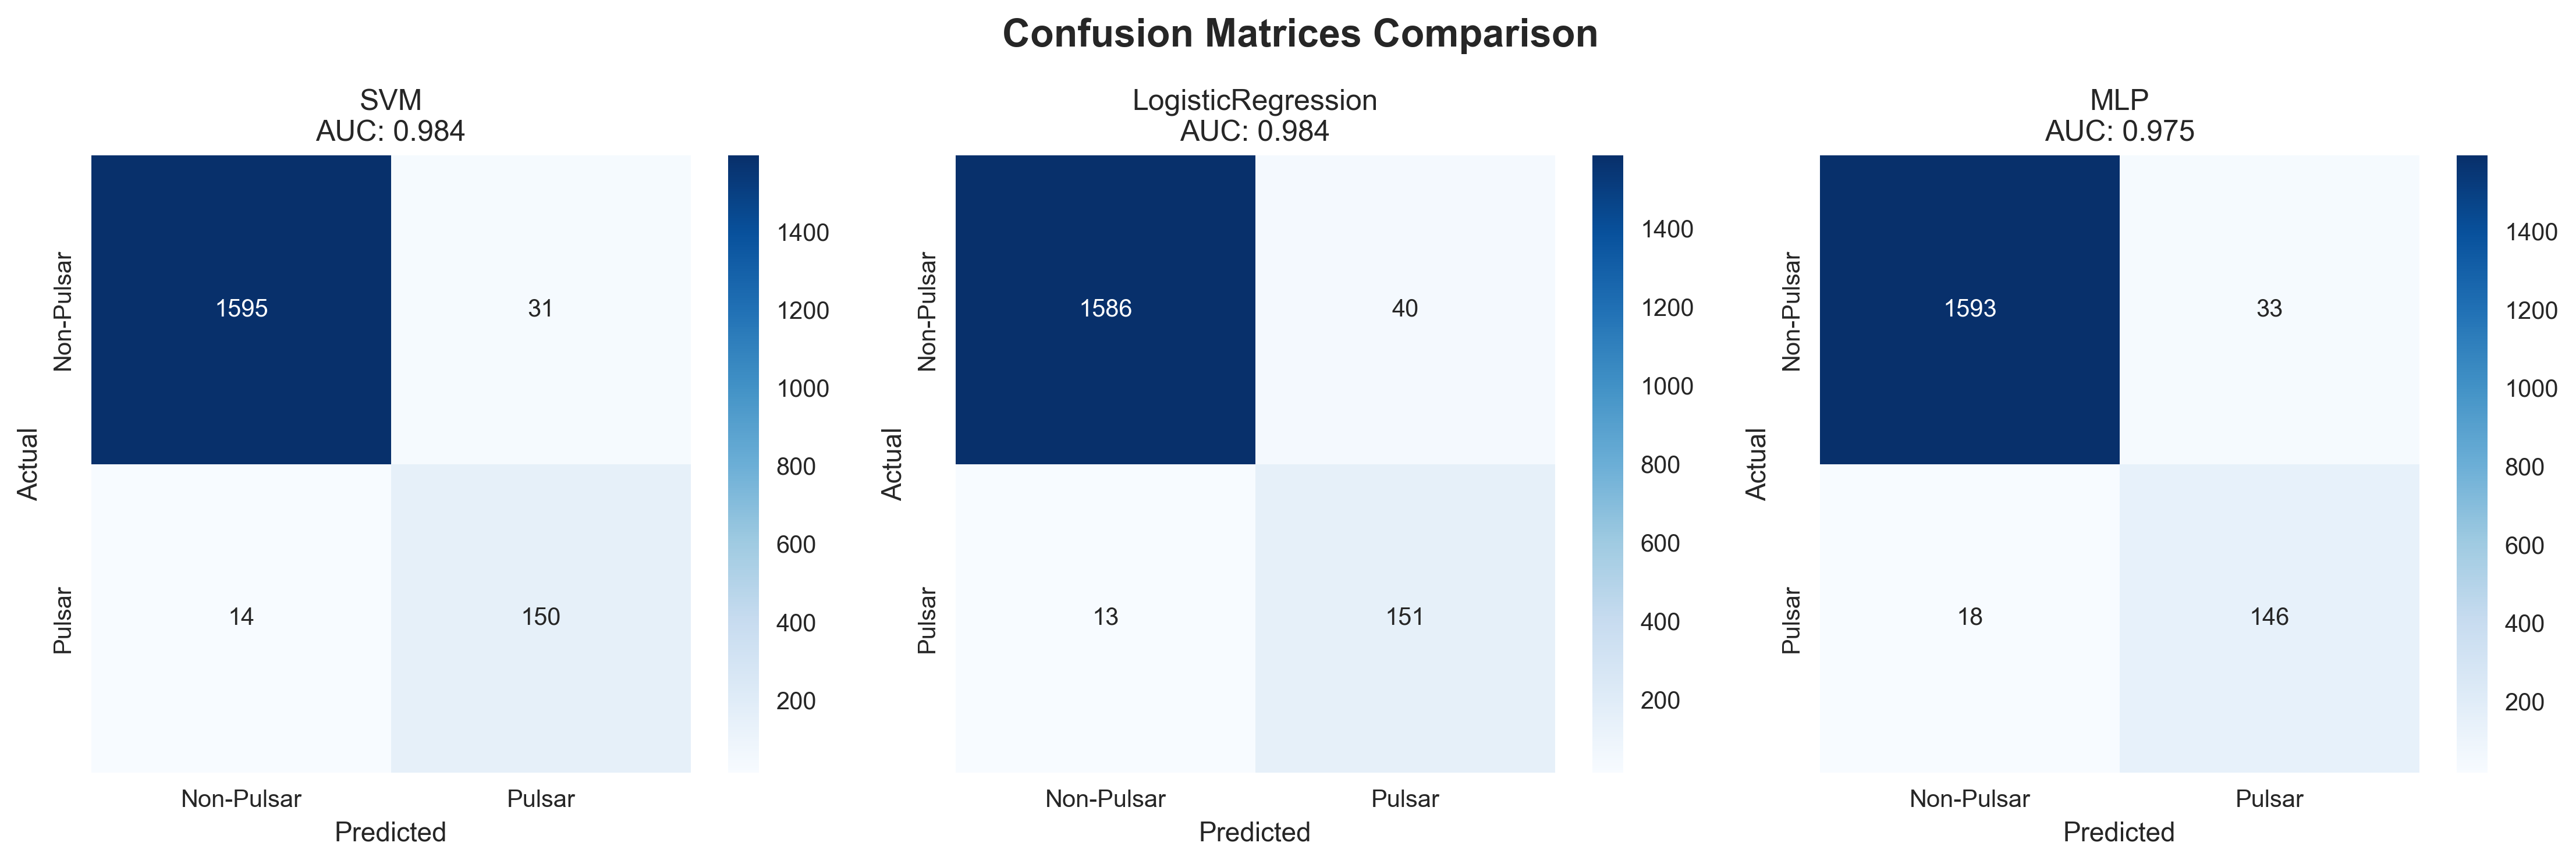

In [5]:
# Initialize visualization
viz = VisualizationUtils()

# Plot ROC curves
viz.plot_roc_curves(
    {name: res for name, res in model_framework.results.items()},
    y_val,
    save_path="../results/figures/roc_curves.png"
)

# Plot Precision-Recall curves
viz.plot_precision_recall_curves(
    {name: res for name, res in model_framework.results.items()},
    y_val,
    save_path="../results/figures/pr_curves.png"
)

# Plot confusion matrices for top 3 models
top_models = results_df.head(3)['Model'].tolist()
top_results = {model: model_framework.results[model] for model in top_models}
viz.plot_confusion_matrices(
    top_results,
    y_val,
    save_path="../results/figures/confusion_matrices.png"
)



Feature Importance for SVM:
Mean_Profile: 0.4768
Std_Profile: 0.0037
Excess_kurtosis_Profile: 1.7413
Skewness_Profile: 0.4085
Mean_DM: 0.0421
Std_DM: 0.4870
Excess_kurtosis_DM: 0.4661
Skewness_DM: 0.5286


INFO:utils:Feature importance plot saved to ../results/figures/SVM_feature_importance.png


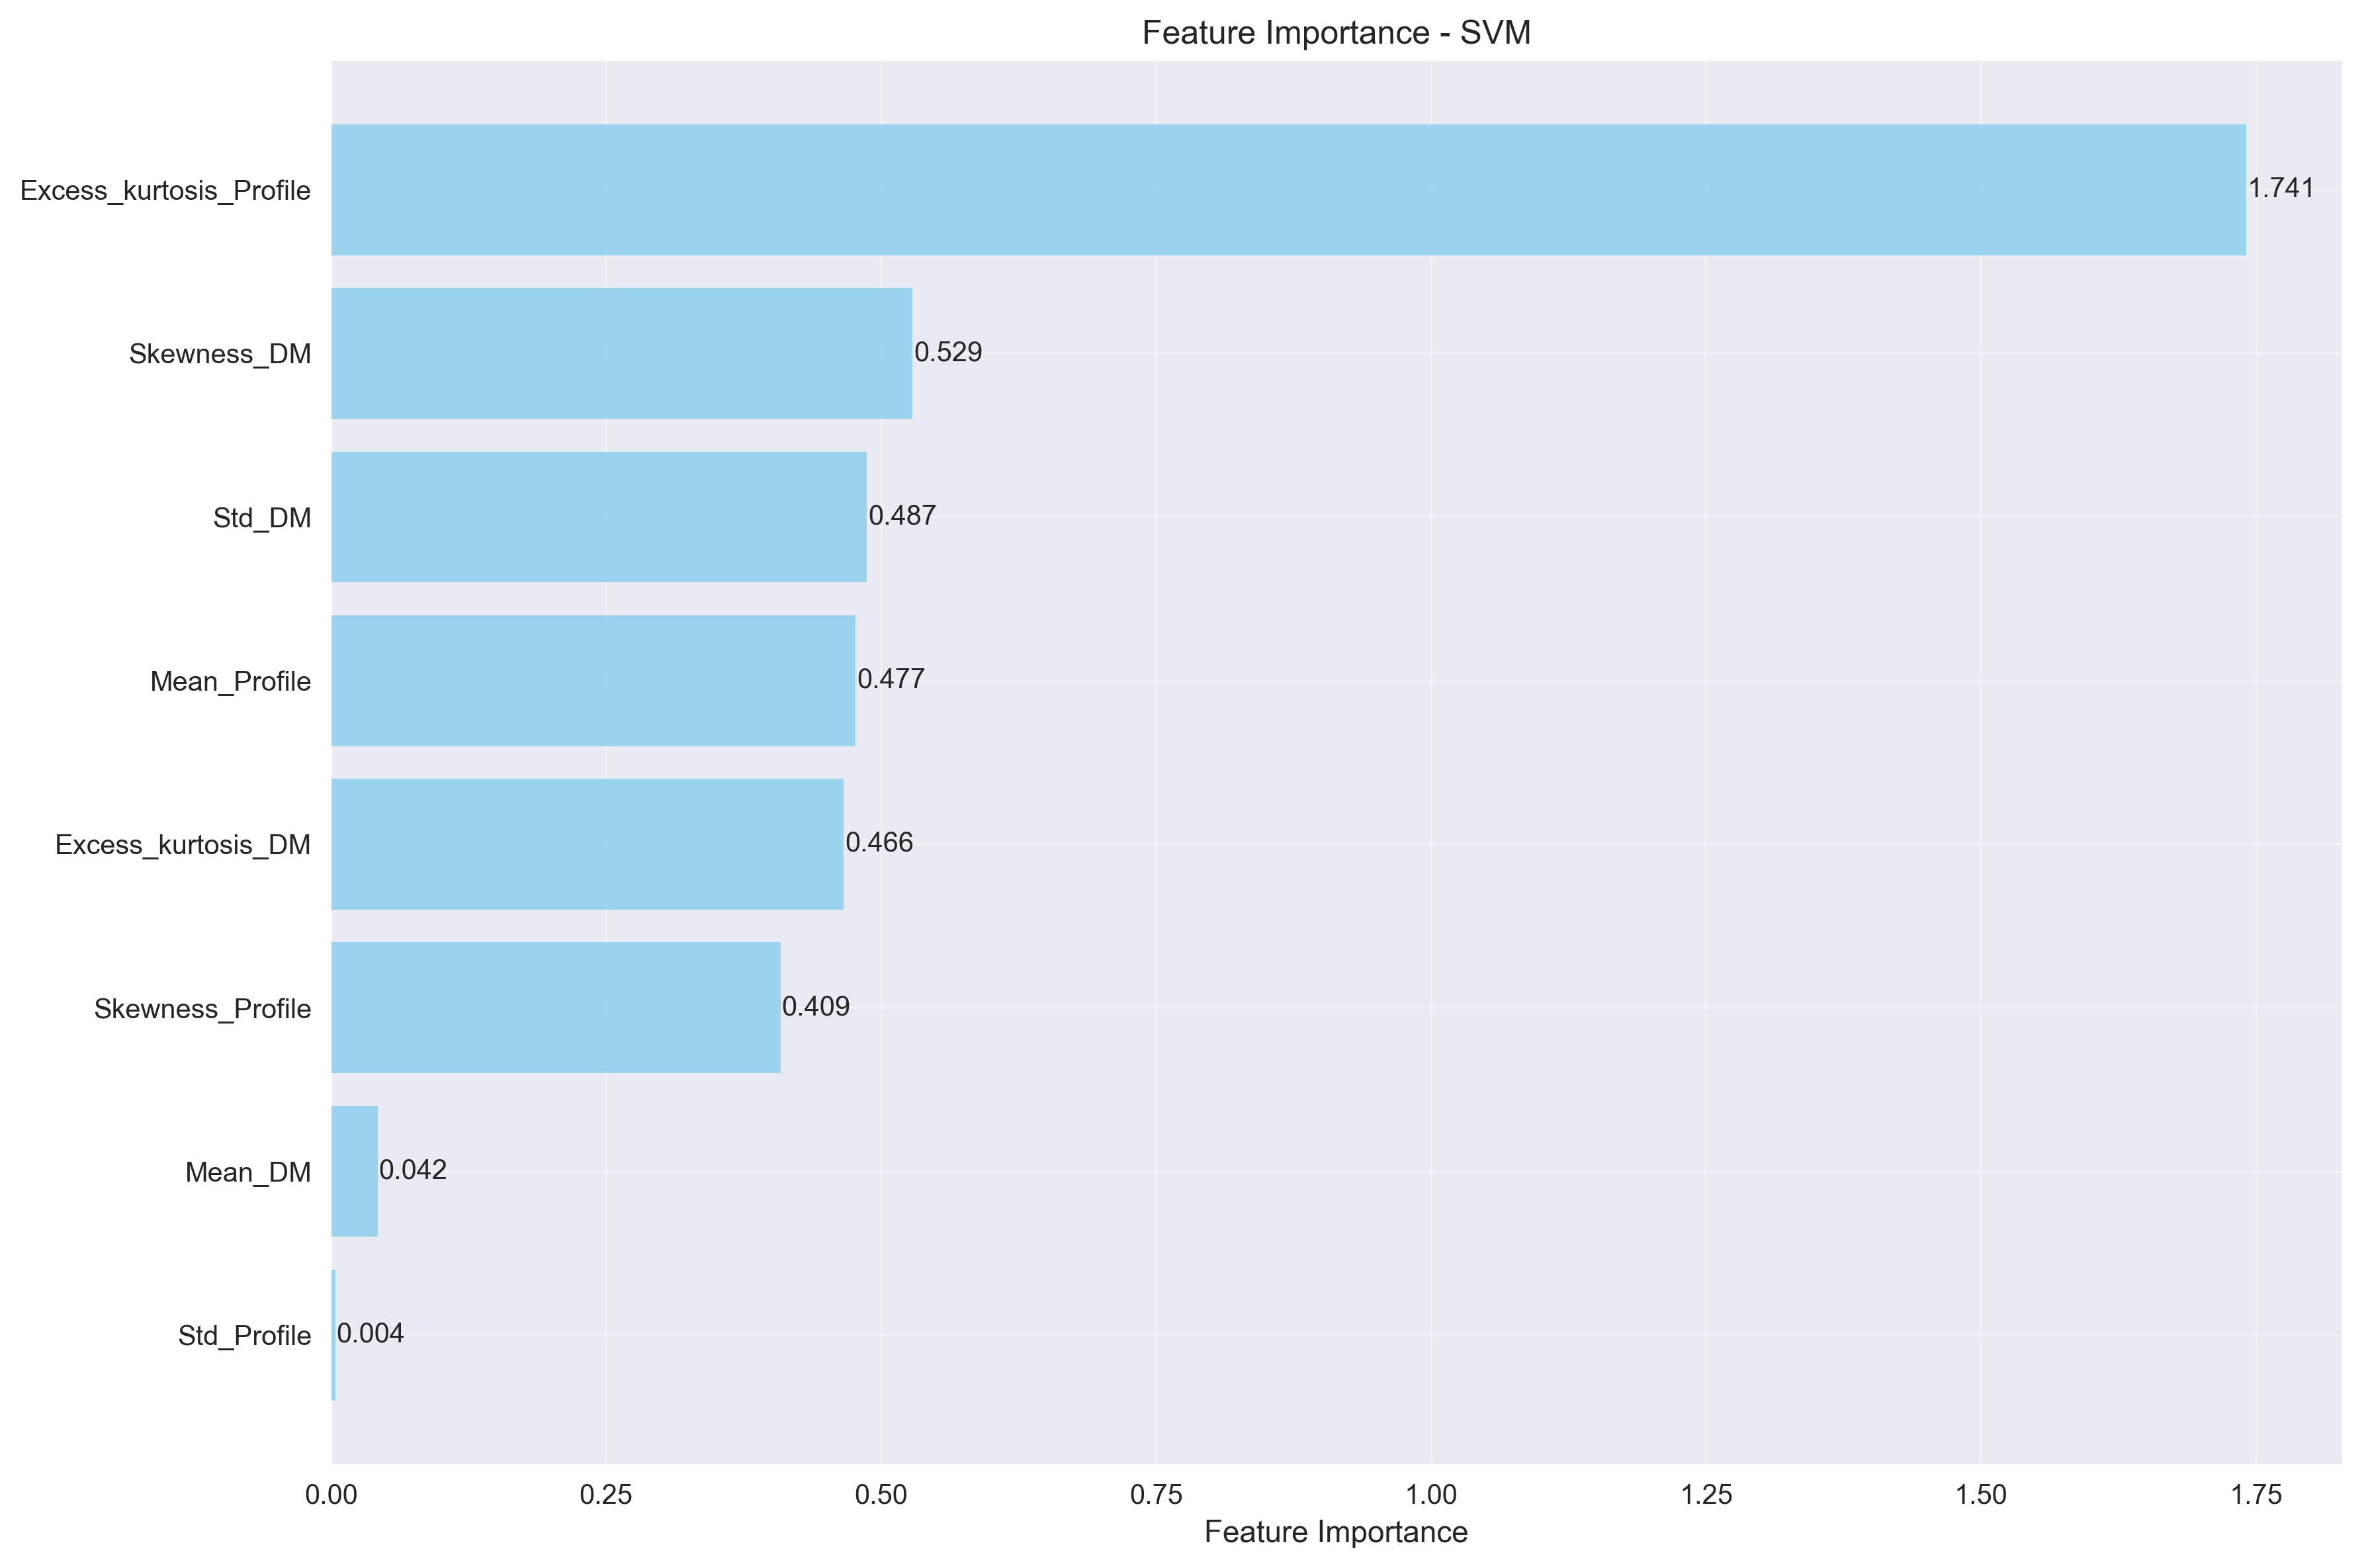

In [6]:
# Get feature importance for the best model
best_model_name = model_framework.best_model
feature_importance = model_framework.get_feature_importance(best_model_name)

if feature_importance is not None:
    print(f"\nFeature Importance for {best_model_name}:")
    for feature, importance in zip(preprocessor.feature_names, feature_importance):
        print(f"{feature}: {importance:.4f}")
    
    # Plot feature importance
    viz.plot_feature_importance(
        model_framework.trained_models[best_model_name]['model'],
        preprocessor.feature_names,
        best_model_name,
        save_path=f"../results/figures/{best_model_name}_feature_importance.png"
    )


In [7]:
# Evaluate best model on test set
best_model = model_framework.trained_models[best_model_name]['model']
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Generate classification report
from sklearn.metrics import classification_report
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=['Non-Pulsar', 'Pulsar']))

# Compute ROC AUC
from sklearn.metrics import roc_auc_score
test_auc = roc_auc_score(y_test, y_test_proba)
print(f"\nTest ROC AUC: {test_auc:.4f}")


Test Set Performance:
              precision    recall  f1-score   support

  Non-Pulsar       0.99      0.98      0.99      3252
      Pulsar       0.82      0.92      0.86       328

    accuracy                           0.97      3580
   macro avg       0.90      0.95      0.92      3580
weighted avg       0.98      0.97      0.97      3580


Test ROC AUC: 0.9708


In [8]:
# Save best model
model_framework.save_model(
    best_model_name,
    f"../models/{best_model_name}_best.pkl"
)

# Save scaler for future use
preprocessor.save_preprocessor("../models/scaler.pkl")

print(f"\nBest model ({best_model_name}) and scaler saved to /models/")

INFO:models:SVM saved to ../models/SVM_best.pkl
INFO:preprocess:Scaler saved to ../models/scaler.pkl



Best model (SVM) and scaler saved to /models/


In [10]:
print("\n" + "="*50)
print("MODELING SUMMARY")
print("="*50)

print(f"""
1. Best Model: {best_model_name} (ROC AUC: {model_framework.best_score:.4f})
2. Test Performance:
   - ROC AUC: {test_auc:.4f}
3. Key Features:
   - Most important: {preprocessor.feature_names[np.argmax(feature_importance)]}
   - Least important: {preprocessor.feature_names[np.argmin(feature_importance)]}

Next Steps:
- Proceed to model interpretability (SHAP, LIME)
- Consider ensemble methods if performance needs improvement
- Optimize decision threshold for precision/recall trade-off
""")


MODELING SUMMARY

1. Best Model: SVM (ROC AUC: 0.9843)
2. Test Performance:
   - ROC AUC: 0.9708
3. Key Features:
   - Most important: Excess_kurtosis_Profile
   - Least important: Std_Profile

Next Steps:
- Proceed to model interpretability (SHAP, LIME)
- Consider ensemble methods if performance needs improvement
- Optimize decision threshold for precision/recall trade-off

